## Working with Multi-Year ACS Data

The censusdis package only supports downloading data one year at a time. Since I am interested in analyzing trends over time, I wrote three functions to make it easier to work with what I call "multi-year ACS data". The functions are `download_multiyear`, `graph_multiyear` and `pct_change_multiyear`. This notebook demonstrates their usage.

The first ACS 5-year estimates were published in 2010. You are not supposed to compare years with overlapping data. This leaves us with 3 vintages to compare: 2010, 2015 and 2020. For this workbook I will be using [B05012: Nativity in the United States](https://data.census.gov/table/ACSDT5Y2020.B05012?g=9700000US3612510).

As a reminder, all code in this repo (including `utils.py`) is open source and released under the MIT License. Feel free to use it for your own project.

### Downloading Multiple Years of ACS Data 

The API to `download_multiyear` is designed to mirror that of `ced.download`, which was introduced in the previous notebook. The principal difference is that the second parameter is now a list of years (for ced.download it is a single year).

In [1]:
from censusdis.datasets import ACS5
from censusdis.states import NY

from utils import download_multiyear

df = download_multiyear(
    dataset=ACS5,
    vintages=[2010, 2015, 2020],
    group="B05012",
    prompt=False,
    state=NY,
    school_district_unified="12510",
)
df

	'Estimate!!Total' in [2010, 2015]
	'Estimate!!Total:' in [2020]
	'Estimate!!Total!!Native' in [2010, 2015]
	'Estimate!!Total:!!Native' in [2020]
	'Estimate!!Total!!Foreign-Born' in [2010, 2015]
	'Estimate!!Total:!!Foreign-Born' in [2020]


,Total,Native,Foreign-Born,Year
0,43899,30699,13200,2010
0,44975,29935,15040,2015
0,46046,31638,14408,2020


Addditional Parameters:
 * If the parameter `rename_vars` is set to True (the default) then download_multiyear will rename the columns from variables to labels. The labels from the last year will be used.
 * If the parameter `drop_cols` is set to True (the default) then download_multiyear will drop columns which do not contain survey data or year information. This tends to be geographic metadata.

#### Warnings

Note that `download_multiyear` emitted several warnings. These warnings indicate that each variable has had multiple labels over the selected years. As I describe in [this](https://arilamstein.com/blog/2024/05/28/creating-time-series-data-from-the-american-community-survey-acs/) blog post, the ACS was not designed as a time series dataset. In particular, variables can change meaning over time. In this case the difference is minor (the label "Total" changed to "Total:"). But in some cases variables are used for completely different things. These warnings should always be carefully reviewed. If the `prompt` parameter is True (the default), then the user is prompted to confirm whether they want to continue downloading the dataset despite the mismatch.

### Graphing Multiple Years of ACS Data

The above dataframe can be easily graphed with the function `graph_multiyear`:

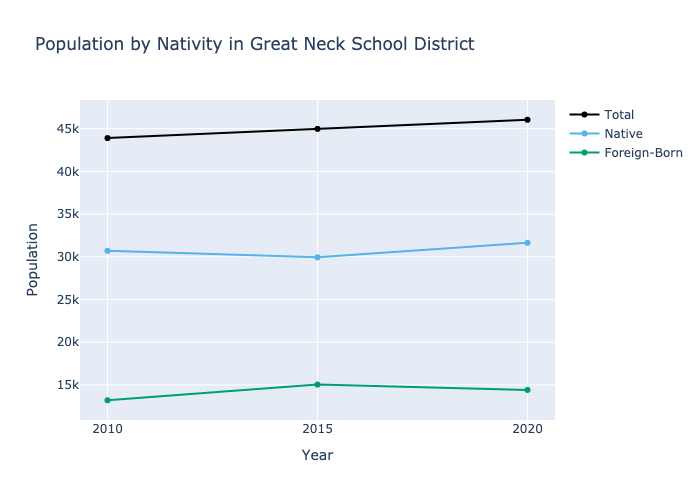

In [2]:
from utils import graph_multiyear

graph_multiyear(
    df=df,
    title="Population by Nativity in Great Neck School District",
    yaxis_title="Population",
)

These graphs will render interactively on your local machine. However, github can only render them as static images. 

There is an optional parameter `y_cols` that allows you to render only a portion of the data:

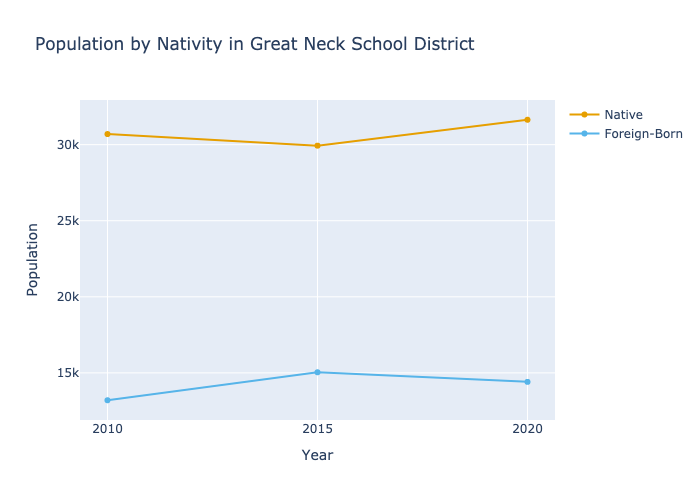

In [3]:
graph_multiyear(
    df=df,
    title="Population by Nativity in Great Neck School District",
    yaxis_title="Population",
    y_cols=["Native", "Foreign-Born"],
)

### Graphing Percent Change

While Pandas has a function `pct_change`, it is difficult to use on our dataset because it works on all columns (including the "Year" column). Since I anticipate doing this operation multiple times in this analysis (including boilerplate code like rounding the result), I wrote the function `pct_change_multiyear`:

   Total  Native  Foreign-Born  Year
0    NaN     NaN           NaN  2010
0    2.5    -2.5          13.9  2015
0    2.4     5.7          -4.2  2020


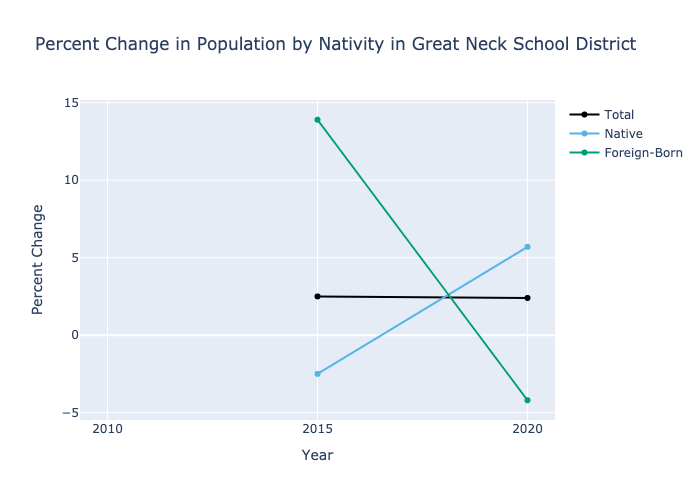

In [4]:
from utils import pct_change_multiyear

df = pct_change_multiyear(df)
print(df)

graph_multiyear(
    df=df,
    title="Percent Change in Population by Nativity in Great Neck School District",
    yaxis_title="Percent Change",
)